In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [6]:
HR_dataset=pd.read_csv('https://raw.githubusercontent.com/shantanu1109/IBM-HR-Analytics-Employee-Attrition-and-Performance-Prediction/main/DATASET/IBM-HR-Analytics-Employee-Attrition-and-Performance-Revised.csv')
HR_dataset

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,College,Life Sciences,Medium,Female,...,Excellent,Low,0,8,0,Bad,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,Below College,Life Sciences,High,Male,...,Outstanding,Very High,1,10,3,Better,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,College,Other,Very High,Male,...,Excellent,Medium,0,7,3,Better,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,Master,Life Sciences,Very High,Female,...,Excellent,High,0,8,3,Better,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,Below College,Medical,Low,Male,...,Excellent,Very High,1,6,3,Better,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,College,Medical,High,Male,...,Excellent,High,1,17,3,Better,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,Below College,Medical,Very High,Male,...,Excellent,Low,1,9,5,Better,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,Bachelor,Life Sciences,Medium,Male,...,Outstanding,Medium,1,6,0,Better,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,Bachelor,Medical,Very High,Male,...,Excellent,Very High,0,17,3,Good,9,6,0,8


In [7]:
HR_dataset.shape

(1470, 31)

In [8]:
HR_dataset.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                   object
EducationField              object
EnvironmentSatisfaction     object
Gender                      object
HourlyRate                   int64
JobInvolvement              object
JobLevel                    object
JobRole                     object
JobSatisfaction             object
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
OverTime                    object
PercentSalaryHike            int64
PerformanceRating           object
RelationshipSatisfaction    object
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYear        int64
WorkLifeBalance             object
YearsAtCompany               int64
YearsInCurrentRole  

In [9]:
HR_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   object
 7   EducationField            1470 non-null   object
 8   EnvironmentSatisfaction   1470 non-null   object
 9   Gender                    1470 non-null   object
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   object
 12  JobLevel                  1470 non-null   object
 13  JobRole                   1470 non-null   object
 14  JobSatisfaction         

In [10]:
HR_dataset.describe()

,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,65.891156,6502.931293,14313.103401,2.693197,15.209524,0.793878,11.279592,2.799320,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,20.329428,4707.956783,7117.786044,2.498009,3.659938,0.852077,7.780782,1.289271,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,30.000000,1009.000000,2094.000000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,48.000000,2911.000000,8047.000000,1.000000,12.000000,0.000000,6.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,66.000000,4919.000000,14235.500000,2.000000,14.000000,1.000000,10.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,83.750000,8379.000000,20461.500000,4.000000,18.000000,1.000000,15.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,100.000000,19999.000000,26999.000000,9.000000,25.000000,3.000000,40.000000,6.000000,40.000000,18.000000,15.000000,17.000000


In [11]:
HR_dataset.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

<AxesSubplot:>

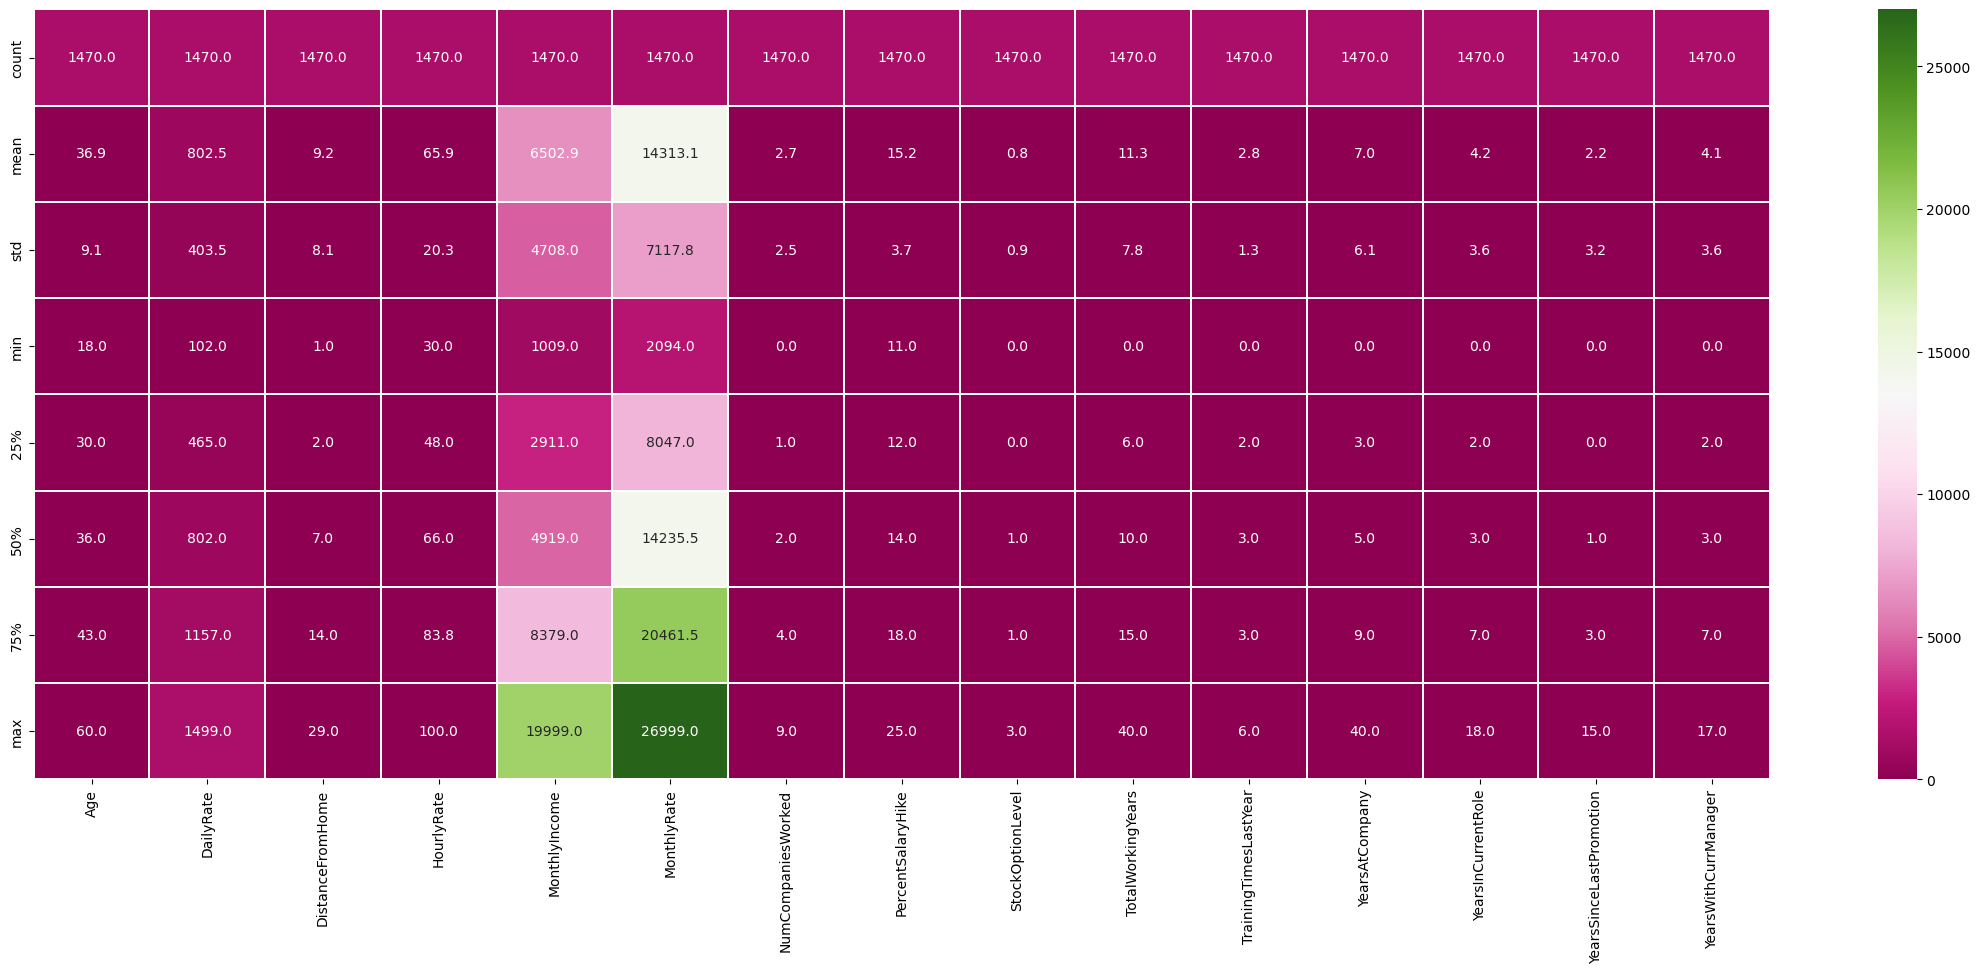

In [12]:
# Visualizing the statistics of the columns using heatmap.
plt.figure(figsize=(28,10))
sns.heatmap(HR_dataset.describe(),linewidths = 0.1,fmt='0.1f',annot = True,cmap='PiYG')

In [13]:
HR_dataset['Attrition'].value_counts()


No     1233
Yes     237
Name: Attrition, dtype: int64

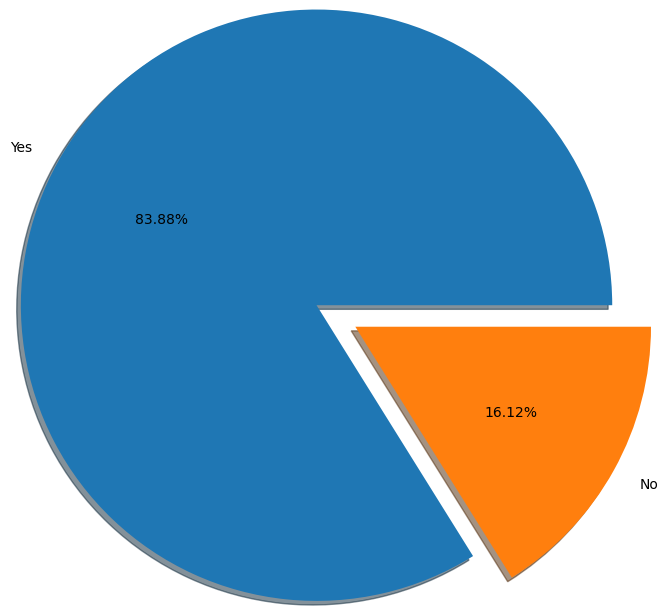

In [14]:
labels = 'Yes','No',
fig, ax = plt.subplots()
ax.pie(HR_dataset['Attrition'].value_counts(),labels = labels,radius =2,autopct = '%2.2f%%',explode=[0.1,0.2], shadow=True,)
plt.show()

In [83]:
Category=['Attrition', 'BusinessTravel', 'Department', 'EducationField',
          'Gender', 'JobRole', 'MaritalStatus']
for i in Category:
    print(i)
    print(HR_dataset[i].value_counts())
    print("="*100)
    


Attrition
0    1233
1     237
Name: Attrition, dtype: int64
BusinessTravel
2.0    1043
1.0     277
0.0     150
Name: BusinessTravel, dtype: int64
Department
1.0    961
2.0    446
0.0     63
Name: Department, dtype: int64
EducationField
1.0    606
3.0    464
2.0    159
5.0    132
4.0     82
0.0     27
Name: EducationField, dtype: int64
Gender
1.0    882
0.0    588
Name: Gender, dtype: int64
JobRole
7.0    326
6.0    292
2.0    259
4.0    145
0.0    131
3.0    102
8.0     83
5.0     80
1.0     52
Name: JobRole, dtype: int64
MaritalStatus
1.0    673
2.0    470
0.0    327
Name: MaritalStatus, dtype: int64


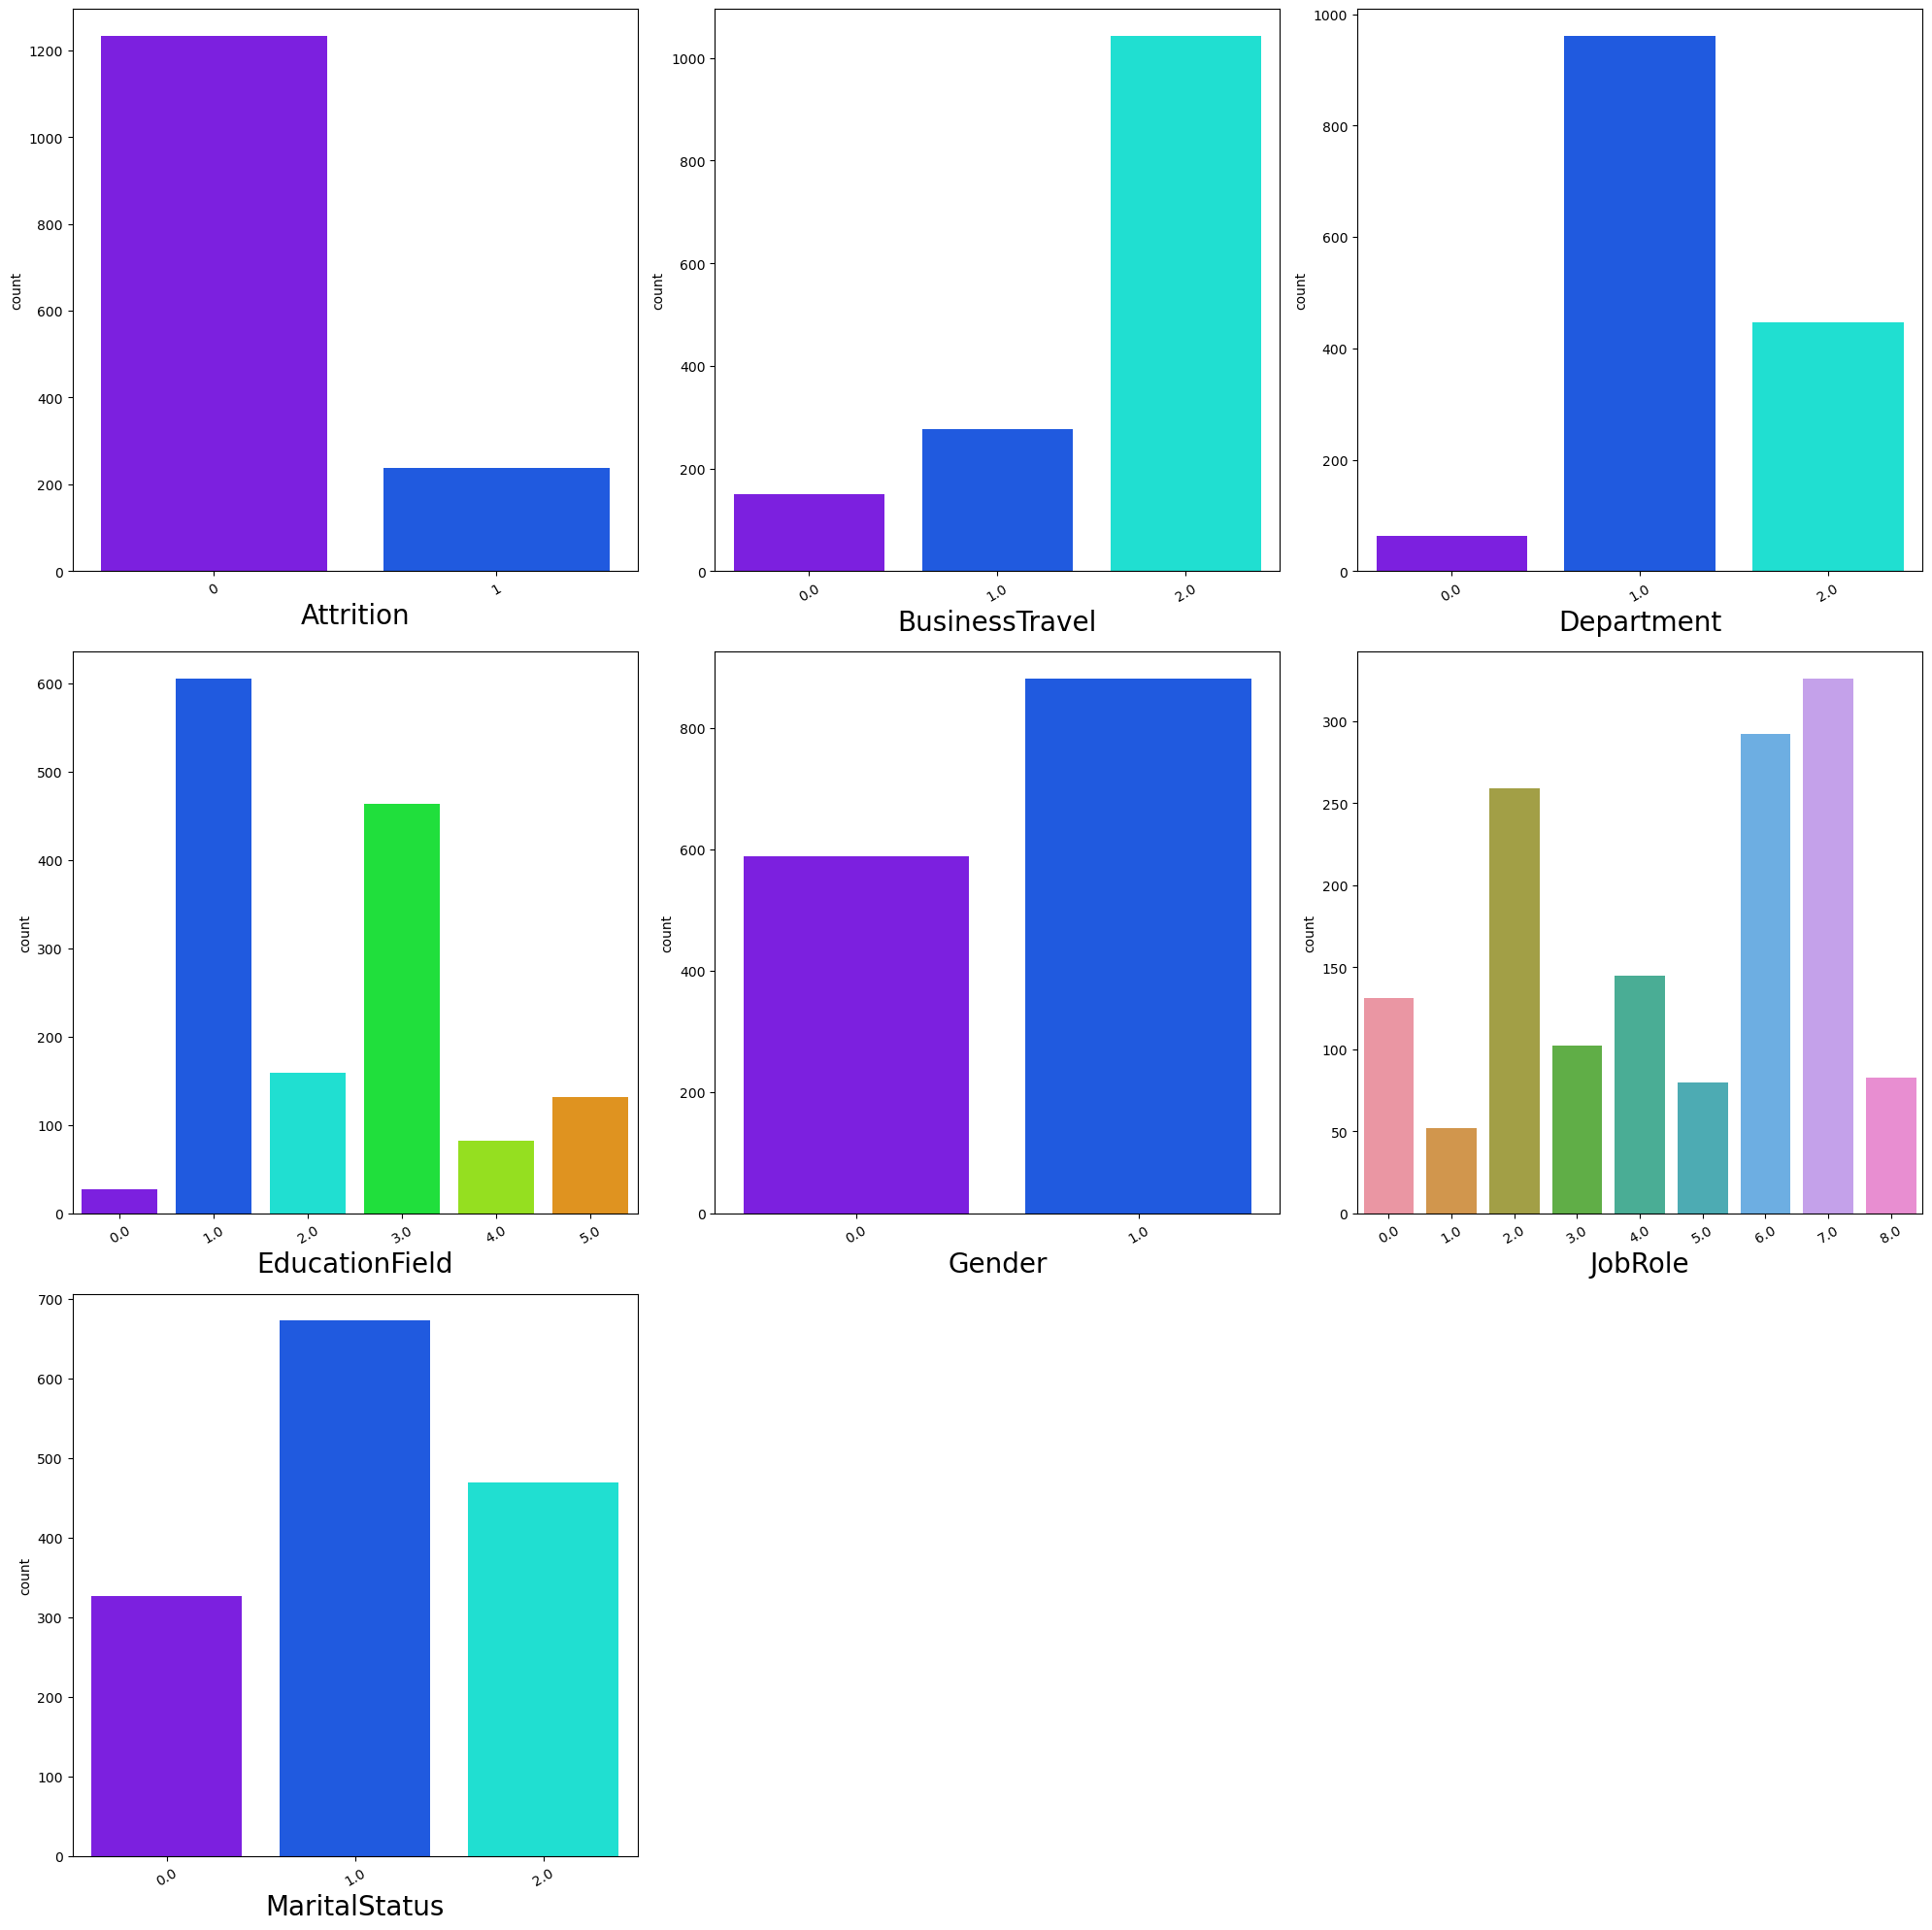

In [84]:
sns.set_palette('gist_rainbow_r')
plt.figure(figsize=(20,20), facecolor='white')
plotnumber =1
Category=['Attrition', 'BusinessTravel', 'Department', 'EducationField',
          'Gender', 'JobRole', 'MaritalStatus', ]
for i in Category:
    if plotnumber <=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.countplot(HR_dataset[i])
        plt.xlabel(i,fontsize=20)
        plt.xticks(rotation=30)
    plotnumber+=1
plt.tight_layout()
plt.show()

In [20]:
Ordinal=['Education','EnvironmentSatisfaction', 'JobInvolvement','JobSatisfaction',
          'RelationshipSatisfaction', 'PerformanceRating', 'WorkLifeBalance' ]
for i in Ordinal:
    print(i)
    print(HR_dataset[i].value_counts())
    print("="*100)

Education
Bachelor         572
Master           398
College          282
Below College    170
Doctor            48
Name: Education, dtype: int64
EnvironmentSatisfaction
High         453
Very High    446
Medium       287
Low          284
Name: EnvironmentSatisfaction, dtype: int64
JobInvolvement
High         868
Medium       375
Very High    144
Low           83
Name: JobInvolvement, dtype: int64
JobSatisfaction
Very High    459
High         442
Low          289
Medium       280
Name: JobSatisfaction, dtype: int64
RelationshipSatisfaction
High         459
Very High    432
Medium       303
Low          276
Name: RelationshipSatisfaction, dtype: int64
PerformanceRating
Excellent      1244
Outstanding     226
Name: PerformanceRating, dtype: int64
WorkLifeBalance
Better    893
Good      344
Best      153
Bad        80
Name: WorkLifeBalance, dtype: int64


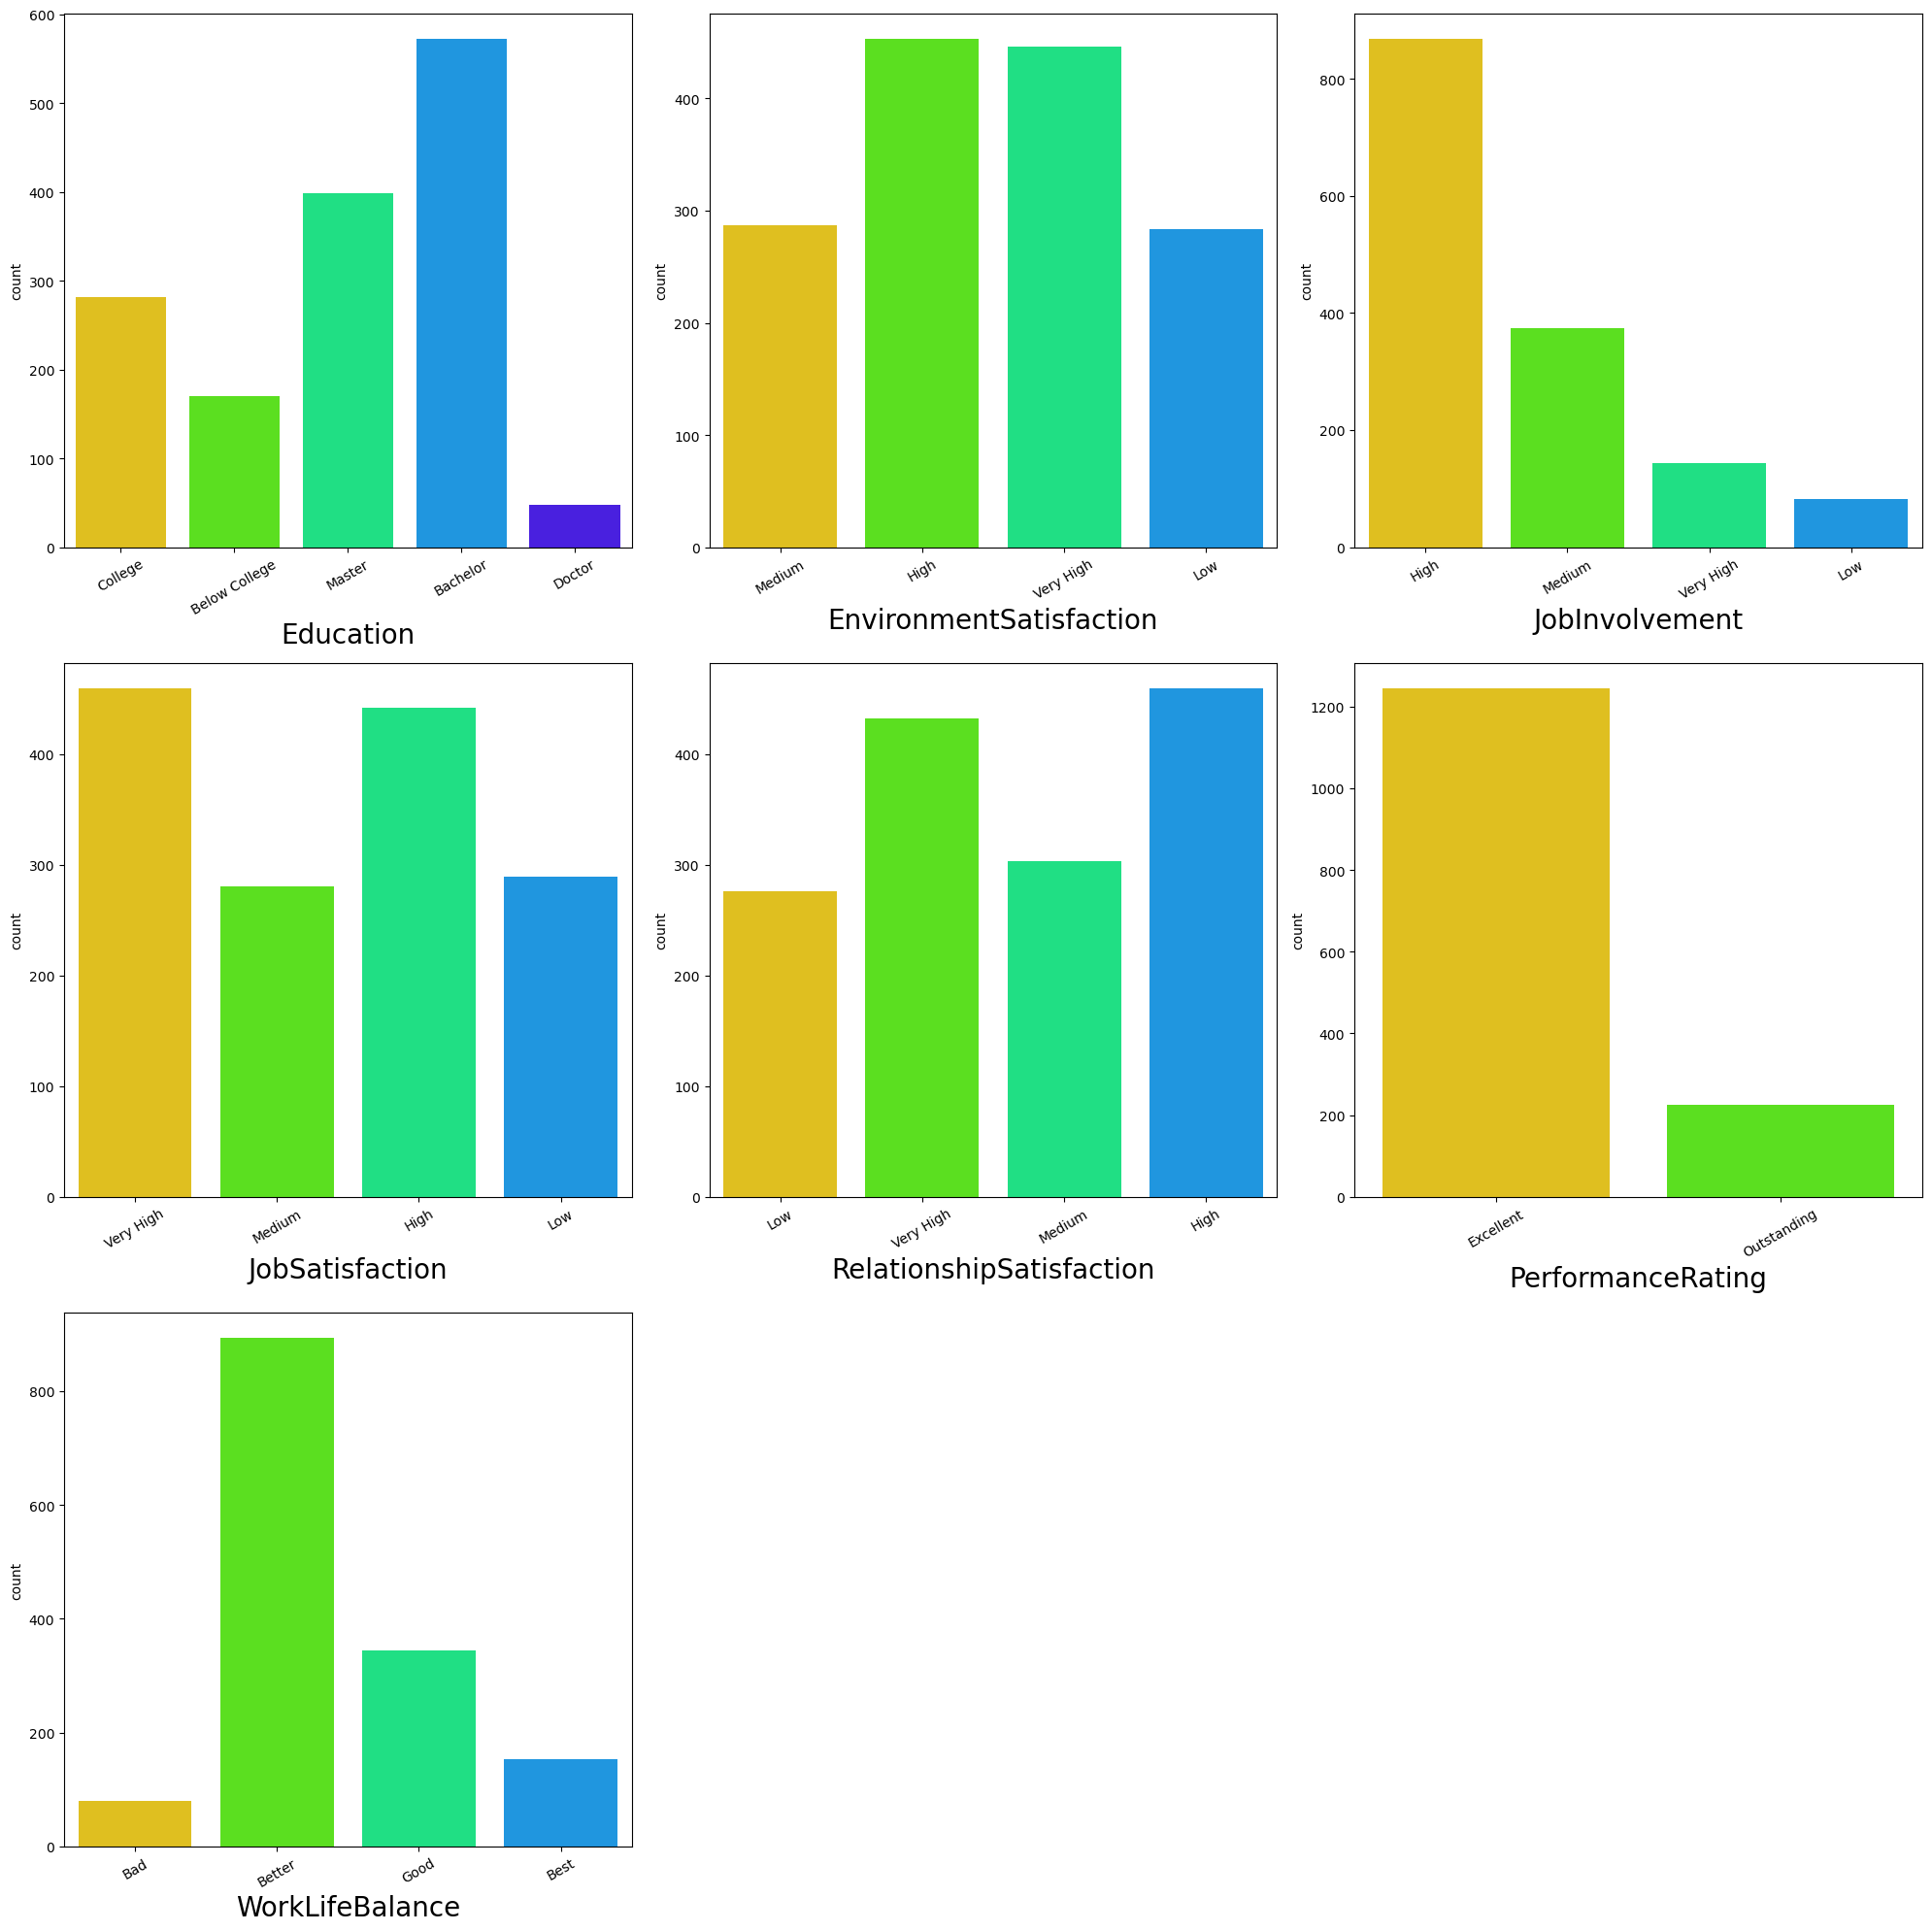

In [21]:
sns.set_palette('hsv')
plt.figure(figsize=(20,20), facecolor='white')
plotnumber =1
Ordinal=['Education','EnvironmentSatisfaction', 'JobInvolvement','JobSatisfaction',
          'RelationshipSatisfaction', 'PerformanceRating', 'WorkLifeBalance' ]
for i in Ordinal:
    if plotnumber <=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.countplot(HR_dataset[i])
        plt.xlabel(i,fontsize=20)
        plt.xticks(rotation=30)
    plotnumber+=1
plt.tight_layout()
plt.show()

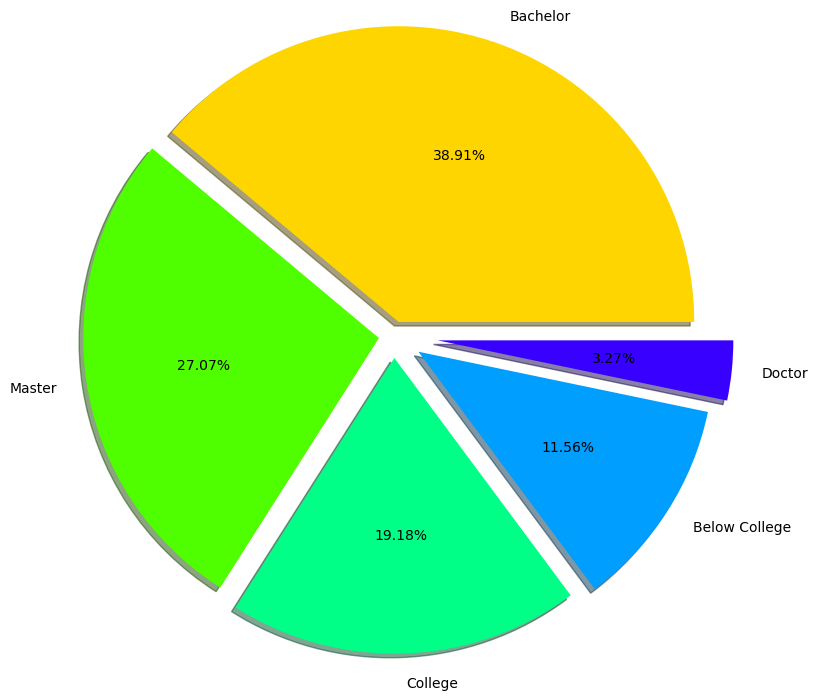

In [22]:
labels='Bachelor','Master','College','Below College','Doctor'
fig, ax = plt.subplots()
ax.pie(HR_dataset['Education'].value_counts(),labels = labels,radius =2,autopct = '%3.2f%%',explode=[0.1,0.1,0.15,0.2,0.3], shadow=True,)
plt.show()

In [23]:
HR_dataset['Department'].value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

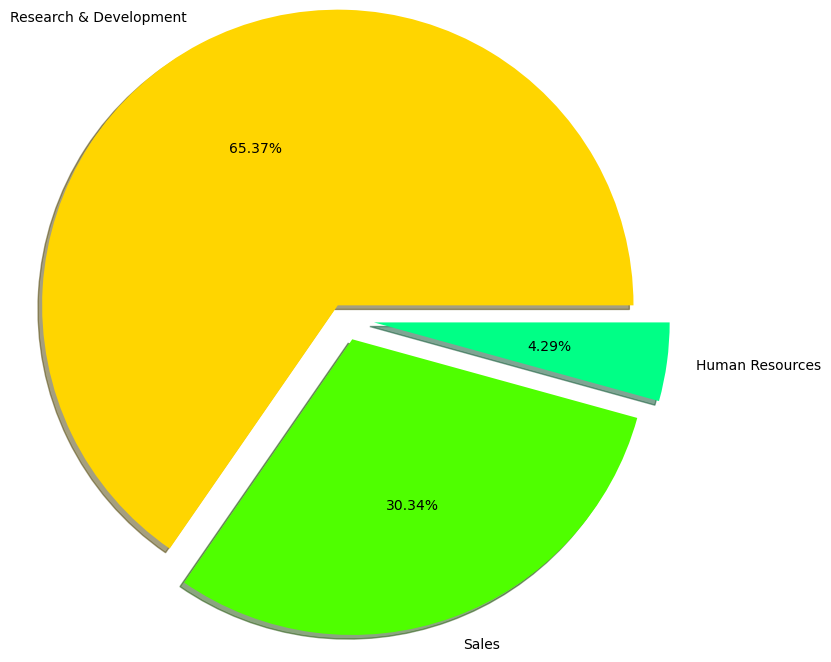

In [24]:
labels ='Research & Development','Sales','Human Resources'
fig,ax= plt.subplots()
ax.pie(HR_dataset['Department'].value_counts(),labels=labels, radius=2,autopct= '%3.2f%%',explode=[0.1,0.15,0.2],shadow=True)
plt.show()

In [25]:
pd.crosstab([HR_dataset.Education],[HR_dataset.Department], margins=True).style.background_gradient(cmap='summer_r')


Department,Human Resources,Research & Development,Sales,All
Education,,,,
Bachelor,27,379,166,572
Below College,5,115,50,170
College,13,182,87,282
Doctor,3,30,15,48
Master,15,255,128,398
All,63,961,446,1470


In [26]:
pd.crosstab([HR_dataset.Education],[HR_dataset.Department,HR_dataset.Attrition], margins=True).style.background_gradient(cmap='summer_r')


In [27]:
HR_dataset['EducationField'].value_counts()

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

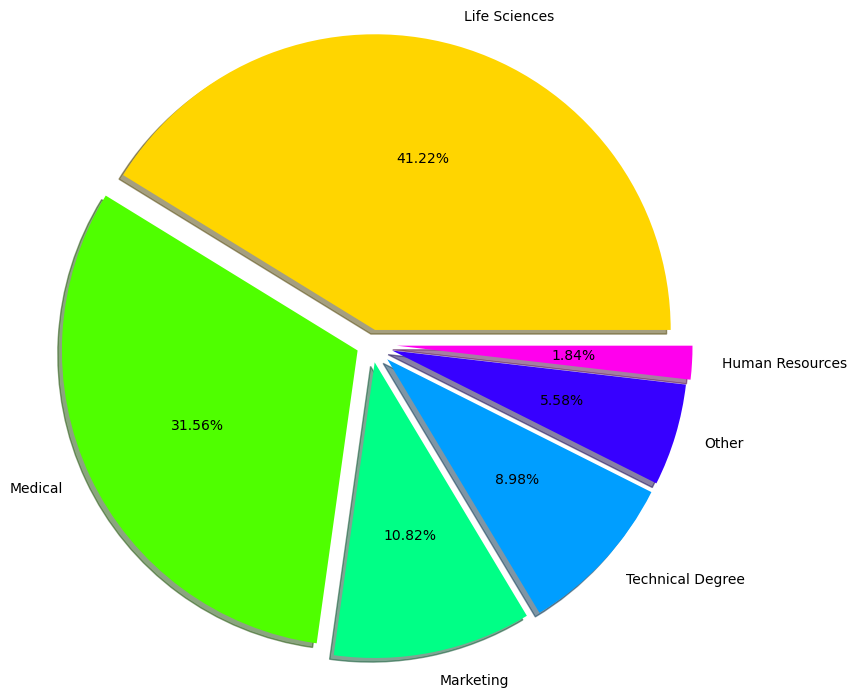

In [28]:
labels ='Life Sciences','Medical','Marketing','Technical Degree','Other','Human Resources'
fig,ax= plt.subplots()
ax.pie(HR_dataset['EducationField'].value_counts(),labels=labels, radius=2,autopct= '%3.2f%%',explode=[0.1,0.1,0.125,0.15,0.15,0.175],shadow=True)
plt.show()

In [29]:
# Let check distribution of education Vs education Field
pd.crosstab([HR_dataset.Education],[HR_dataset.EducationField], margins=True).style.background_gradient(cmap='summer_r')

EducationField,Human Resources,Life Sciences,Marketing,Medical,Other,Technical Degree,All
Education,,,,,,,
Bachelor,16,233,59,183,24,57,572
Below College,2,67,14,63,5,19,170
College,2,116,24,99,19,22,282
Doctor,2,17,10,15,1,3,48
Master,5,173,52,104,33,31,398
All,27,606,159,464,82,132,1470


In [30]:
# Let check distribution of department Vs education Field
pd.crosstab([HR_dataset.Department],[HR_dataset.EducationField], margins=True).style.background_gradient(cmap='summer_r')

EducationField,Human Resources,Life Sciences,Marketing,Medical,Other,Technical Degree,All
Department,,,,,,,
Human Resources,27,16,0,13,3,4,63
Research & Development,0,440,0,363,64,94,961
Sales,0,150,159,88,15,34,446
All,27,606,159,464,82,132,1470


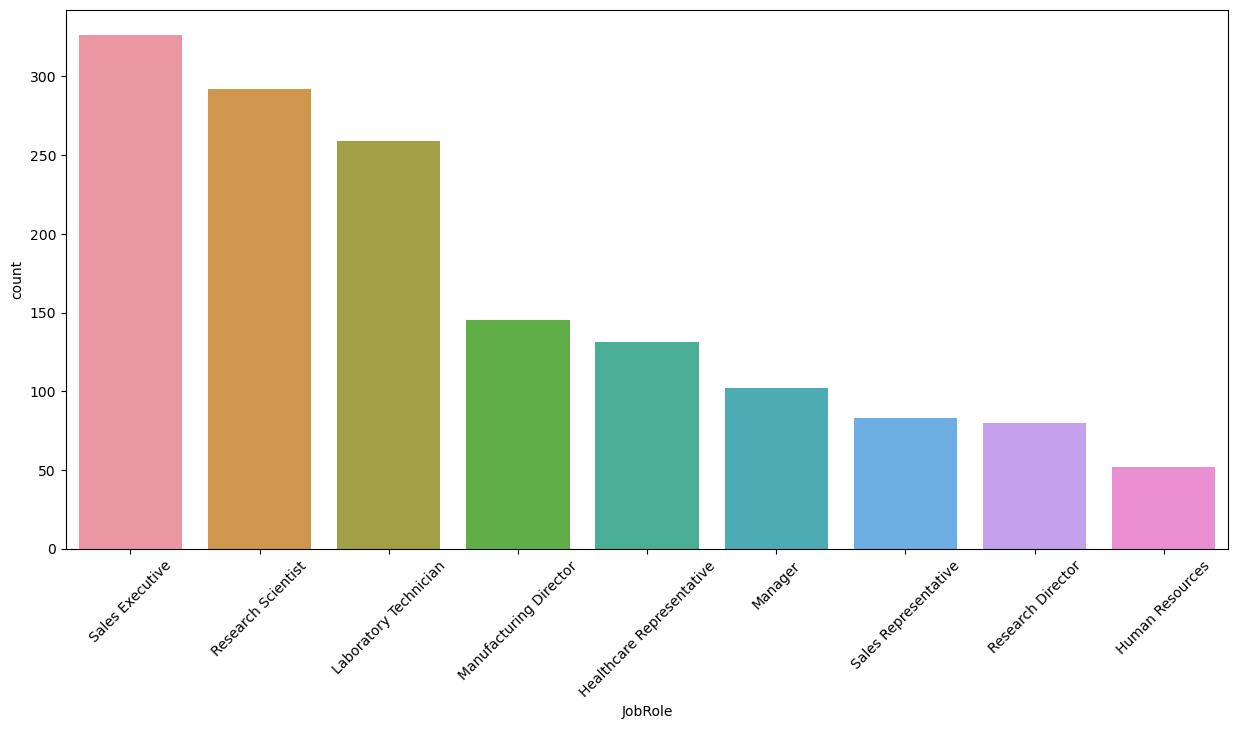

In [31]:
plt.figure(figsize=(15,7))
sns.countplot(HR_dataset['JobRole'])
plt.xticks(rotation=45)
plt.show()

In [32]:
pd.crosstab([HR_dataset.JobRole],[HR_dataset.Department], margins=True).style.background_gradient(cmap='gist_rainbow_r')

Department,Human Resources,Research & Development,Sales,All
JobRole,,,,
Healthcare Representative,0,131,0,131
Human Resources,52,0,0,52
Laboratory Technician,0,259,0,259
Manager,11,54,37,102
Manufacturing Director,0,145,0,145
Research Director,0,80,0,80
Research Scientist,0,292,0,292
Sales Executive,0,0,326,326
Sales Representative,0,0,83,83


<Figure size 1200x1000 with 0 Axes>

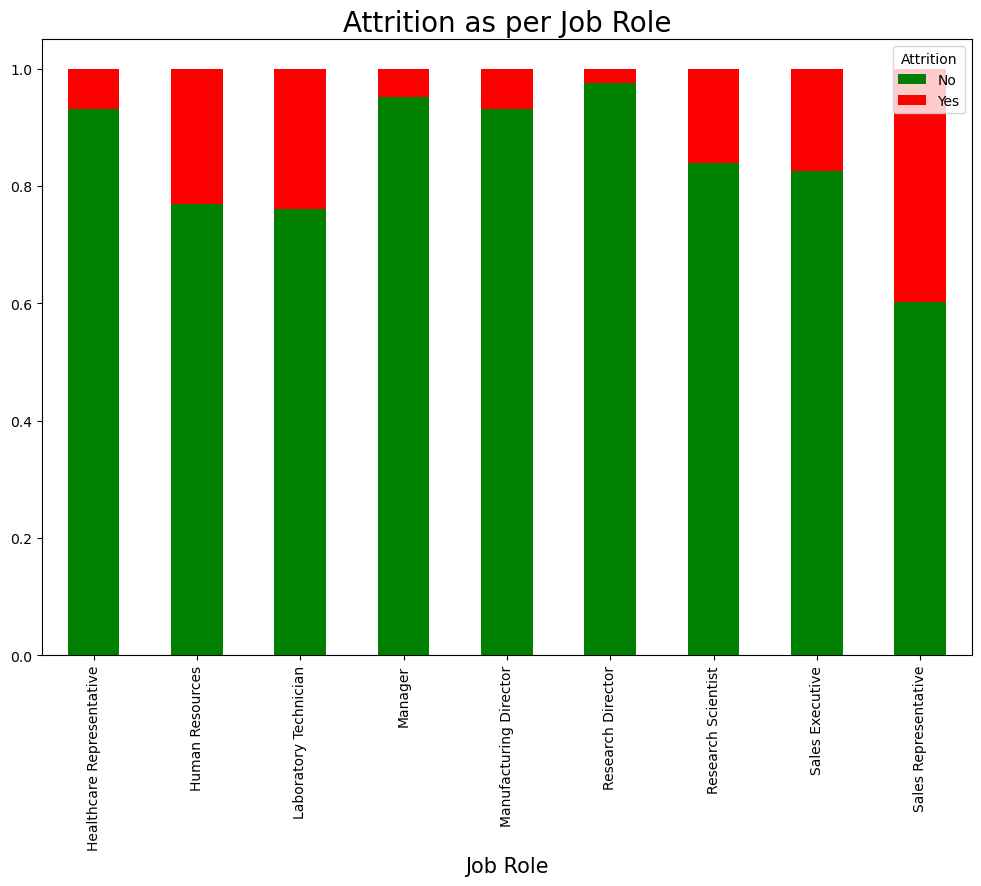

In [33]:
plt.figure(figsize=(12,10))
data=pd.crosstab(HR_dataset['JobRole'], HR_dataset['Attrition'])
data.div(data.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, 
                    color=['green', 'red'],figsize=(12,8))
plt.title('Attrition as per Job Role', fontsize=20)
plt.xlabel('Job Role',fontsize=15)
plt.show()

In [34]:
pd.crosstab([HR_dataset.JobRole,HR_dataset.Department],[HR_dataset.Attrition], margins=True).style.background_gradient(cmap='gist_rainbow_r')


In [36]:
# Grouping Numeric Features
Numeric=['Age', 'DailyRate', 'DistanceFromHome',  
 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 
 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 
 'RelationshipSatisfaction','StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

In [37]:
# Grouping Numeric Features
Numeric_int=['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate','MonthlyIncome', 'MonthlyRate', 
             'NumCompaniesWorked', 'PercentSalaryHike', 'TotalWorkingYears','TrainingTimesLastYear',
             'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

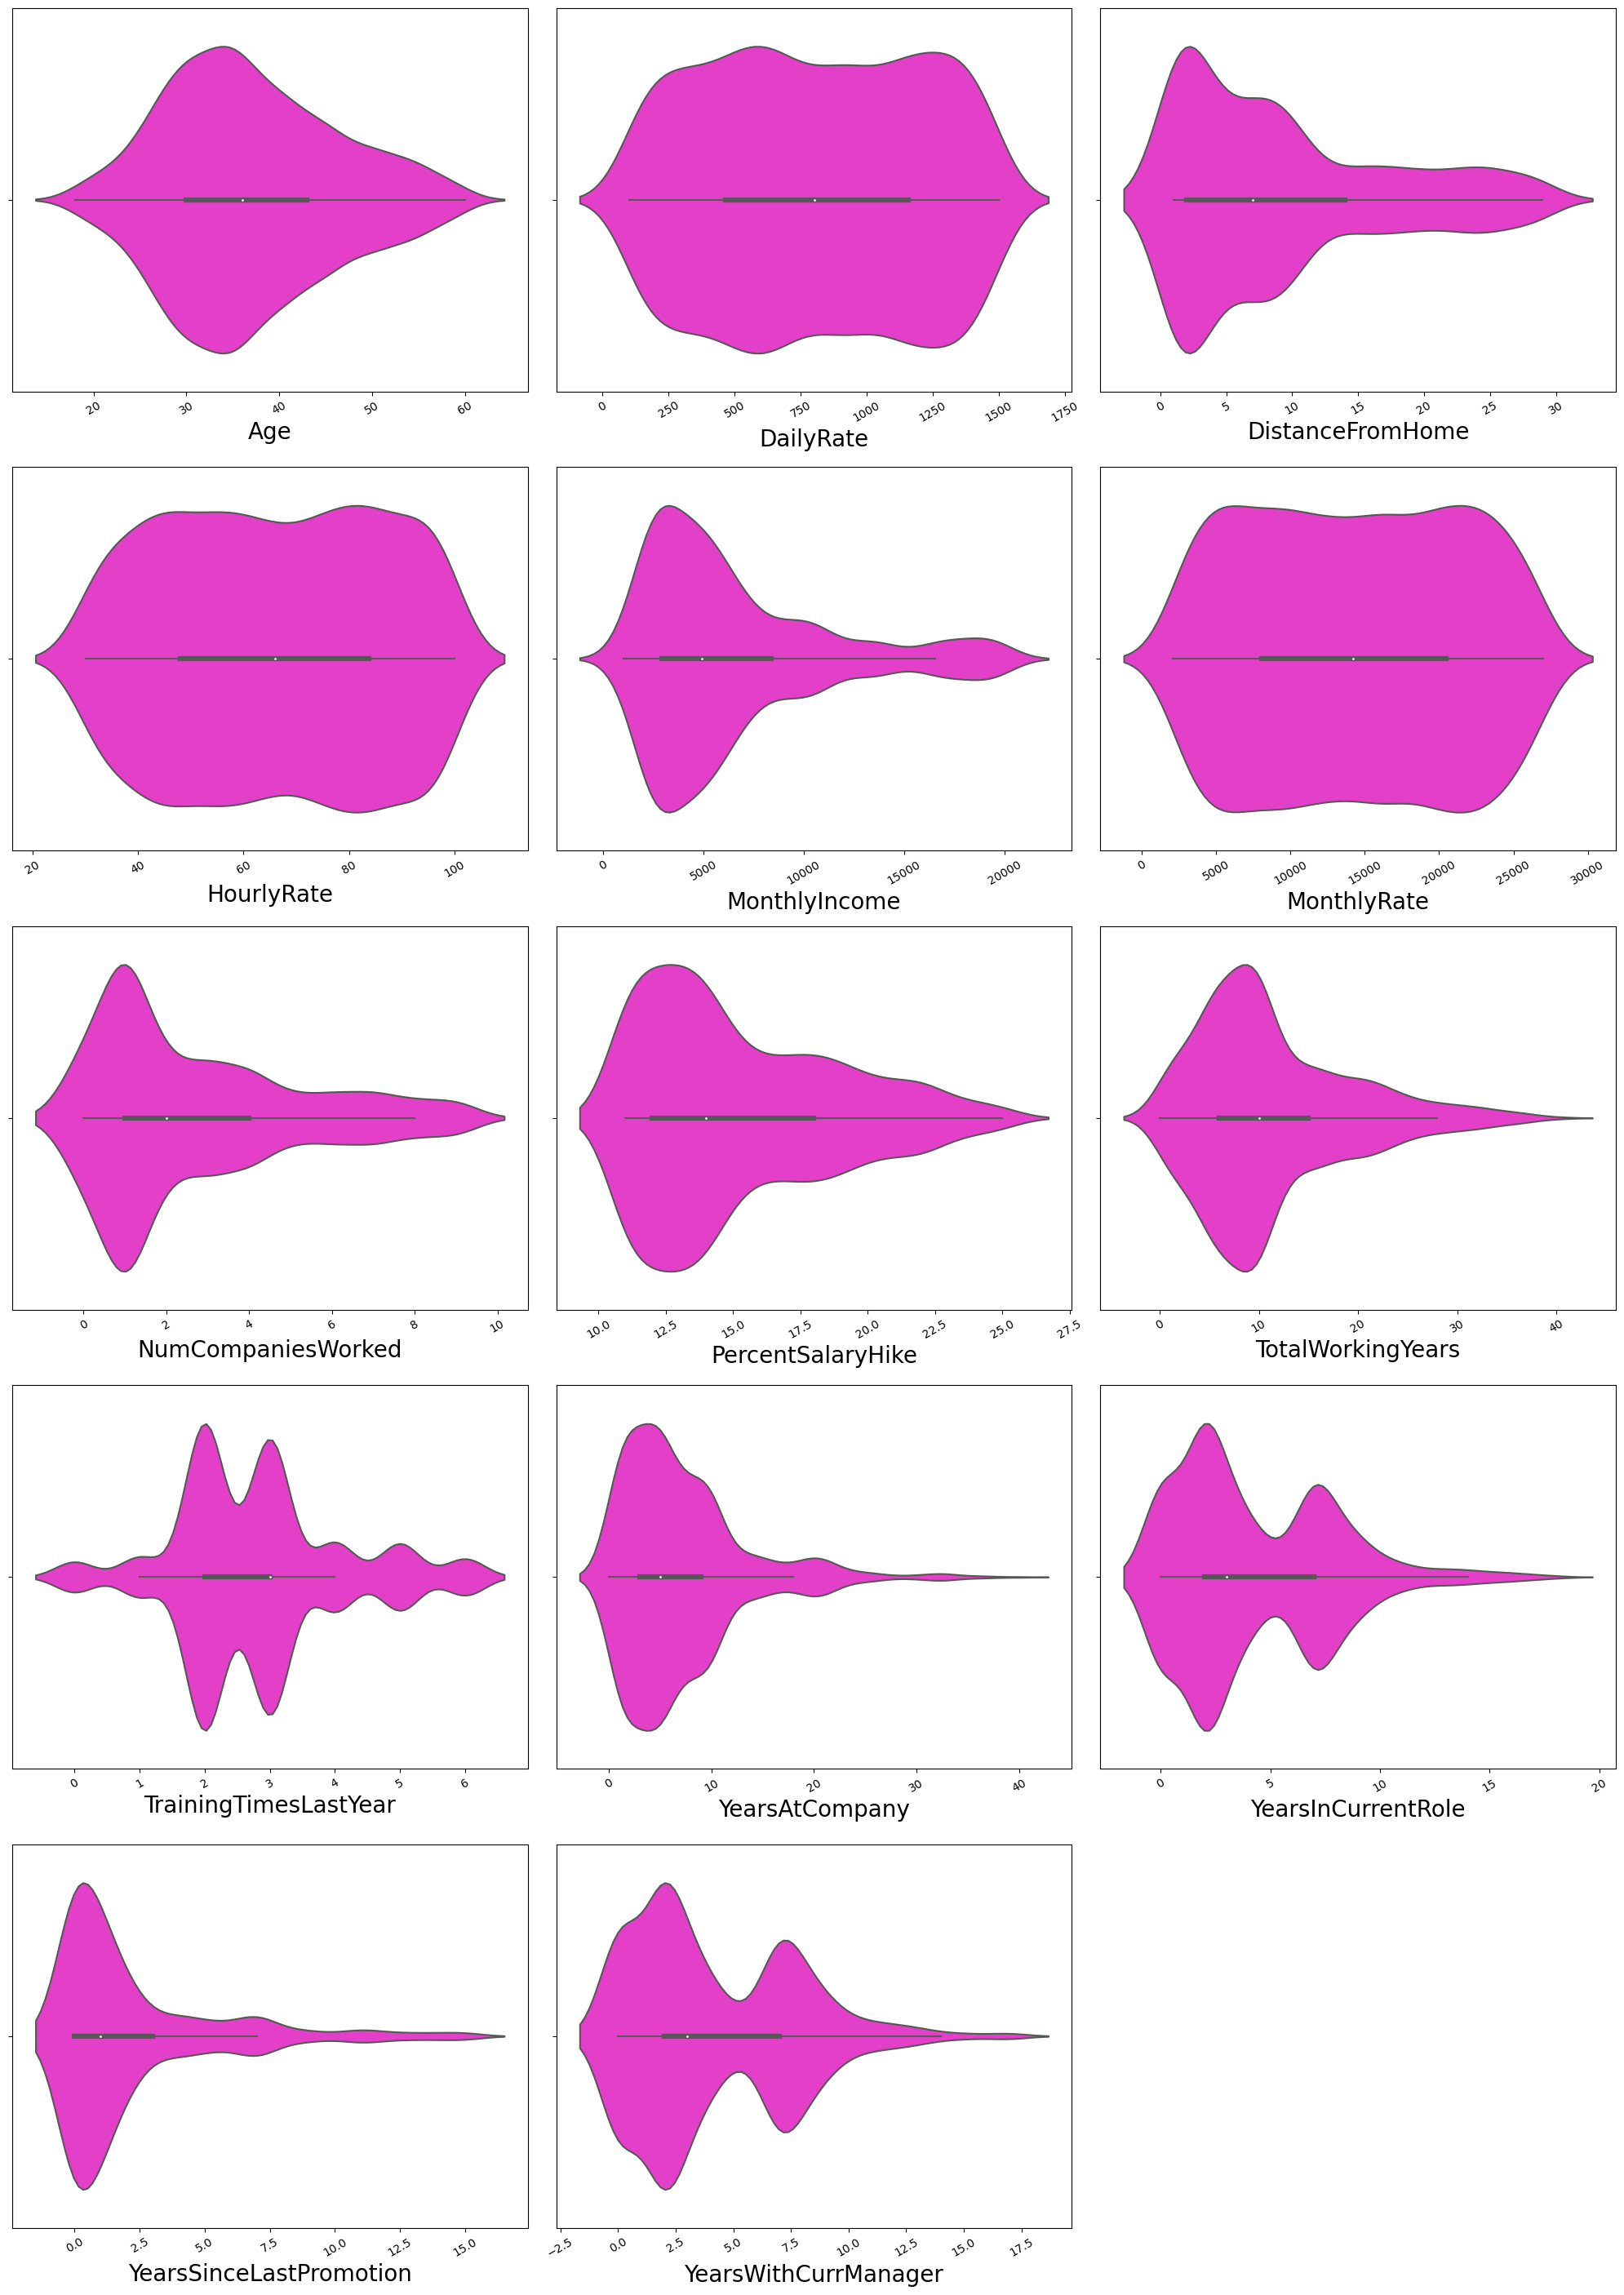

In [38]:
sns.set_palette('spring')
plt.figure(figsize=(20,50), facecolor='white')
plotnumber =1

for i in Numeric_int:
    if plotnumber <=25:
        ax = plt.subplot(9,3,plotnumber)
        sns.violinplot(HR_dataset[i])
        plt.xlabel(i,fontsize=20)
        plt.xticks(rotation=30)
    plotnumber+=1
plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='Age', ylabel='count'>

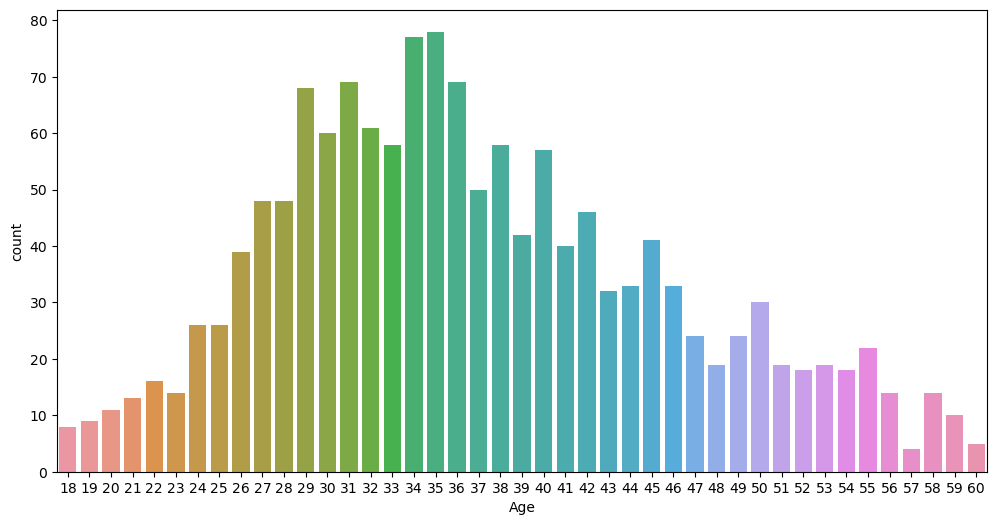

In [40]:
#Age Vs Attrition
plt.subplots(figsize=(12,6))
sns.countplot(HR_dataset['Age'])

<AxesSubplot:xlabel='Age', ylabel='count'>

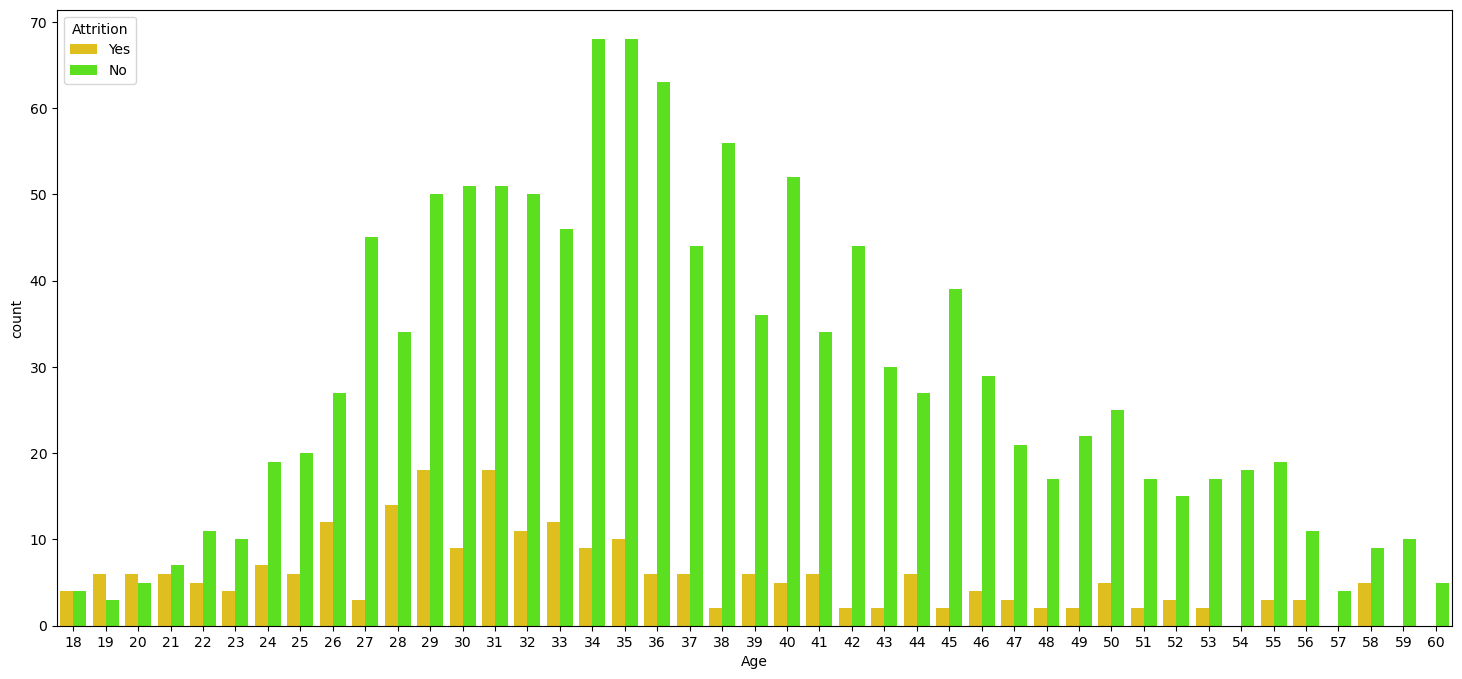

In [41]:
sns.set_palette('hsv')
plt.subplots(figsize=(18,8))
sns.countplot(x='Age', hue='Attrition', data=HR_dataset)

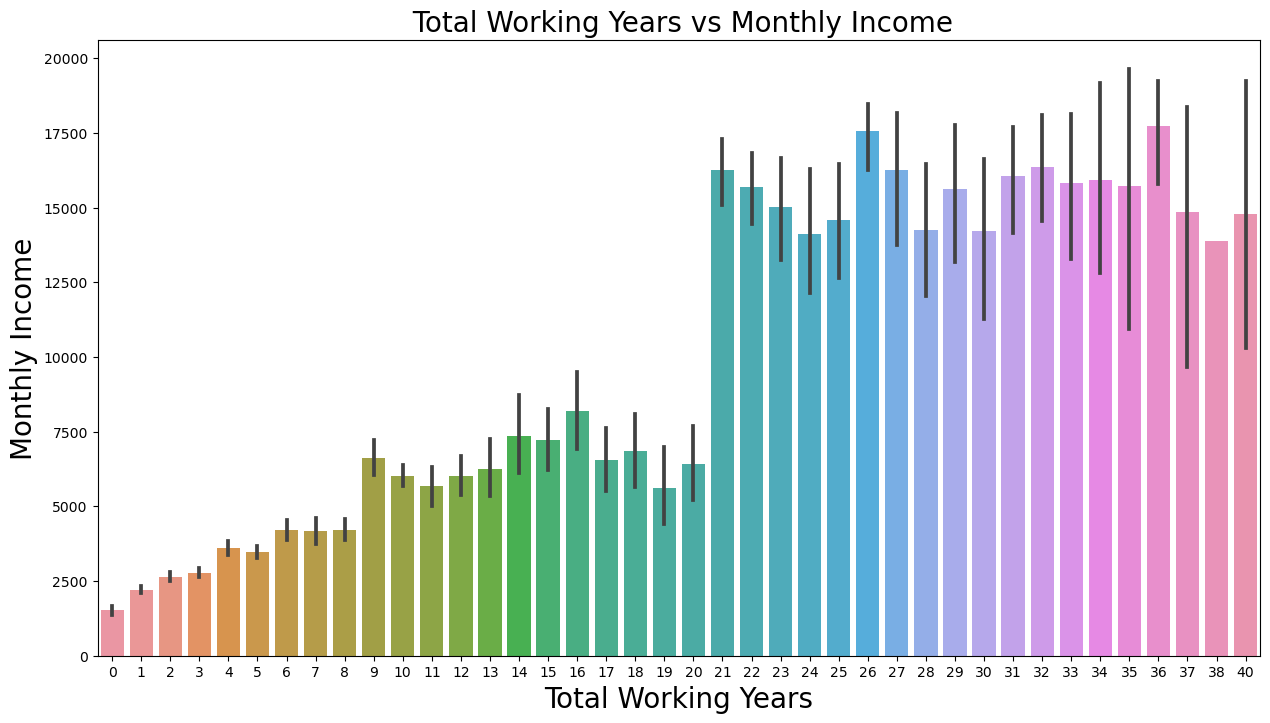

In [42]:
plt.figure(figsize=(15,8))
sns.barplot(HR_dataset['TotalWorkingYears'],HR_dataset['MonthlyIncome'])
plt.xlabel('Total Working Years',fontsize=20)
plt.ylabel('Monthly Income',fontsize=20)
plt.title(" Total Working Years vs Monthly Income", fontsize=20)
plt.show()

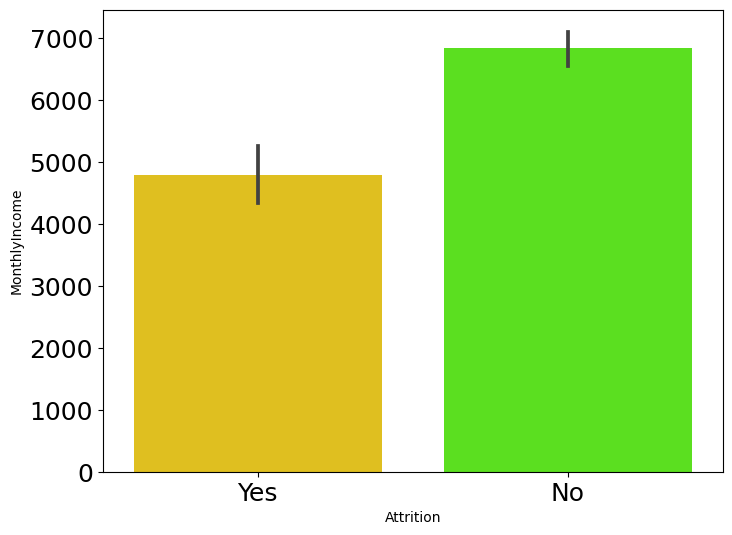

In [43]:
plt.figure(figsize=(8,6))
sns.barplot(x='Attrition',y='MonthlyIncome',data=HR_dataset)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show()

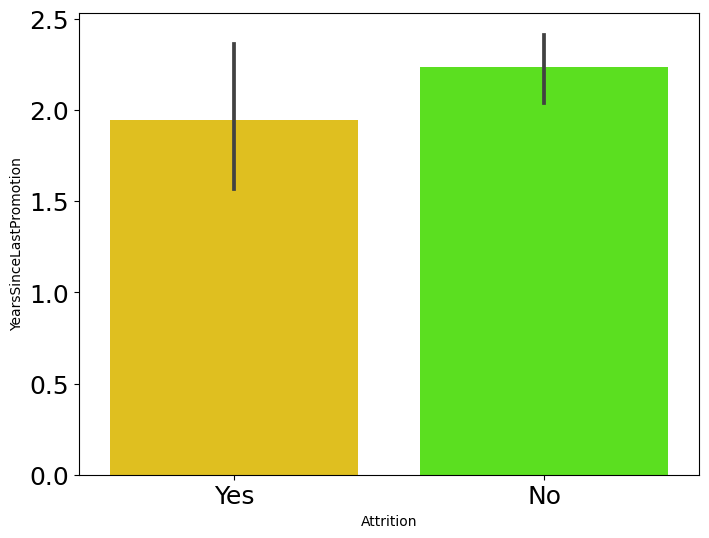

In [44]:
plt.figure(figsize=(8,6))
sns.barplot(x='Attrition',y='YearsSinceLastPromotion',data=HR_dataset)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show()

In [45]:
HR_dataset=pd.read_csv('https://raw.githubusercontent.com/shantanu1109/IBM-HR-Analytics-Employee-Attrition-and-Performance-Prediction/main/DATASET/IBM-HR-Analytics-Employee-Attrition-and-Performance-Revised.csv')
HR_dataset

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,College,Life Sciences,Medium,Female,...,Excellent,Low,0,8,0,Bad,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,Below College,Life Sciences,High,Male,...,Outstanding,Very High,1,10,3,Better,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,College,Other,Very High,Male,...,Excellent,Medium,0,7,3,Better,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,Master,Life Sciences,Very High,Female,...,Excellent,High,0,8,3,Better,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,Below College,Medical,Low,Male,...,Excellent,Very High,1,6,3,Better,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,College,Medical,High,Male,...,Excellent,High,1,17,3,Better,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,Below College,Medical,Very High,Male,...,Excellent,Low,1,9,5,Better,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,Bachelor,Life Sciences,Medium,Male,...,Outstanding,Medium,1,6,0,Better,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,Bachelor,Medical,Very High,Male,...,Excellent,Very High,0,17,3,Good,9,6,0,8


In [46]:
# Using Label Encoder on target variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
HR_dataset["Attrition"] = le.fit_transform(HR_dataset["Attrition"])
HR_dataset.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,College,Life Sciences,Medium,Female,...,Excellent,Low,0,8,0,Bad,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,Below College,Life Sciences,High,Male,...,Outstanding,Very High,1,10,3,Better,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,College,Other,Very High,Male,...,Excellent,Medium,0,7,3,Better,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,Master,Life Sciences,Very High,Female,...,Excellent,High,0,8,3,Better,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,Below College,Medical,Low,Male,...,Excellent,Very High,1,6,3,Better,2,2,2,2


In [48]:
HR_dataset.shape

(1470, 31)

In [49]:
# Ordinal Encoding for ordinal variables
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
def ordinal_encode(HR_dataset, column):
    HR_dataset[column] = oe.fit_transform(HR_dataset[column])
    return HR_dataset

oe_col = ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']
HR_dataset=ordinal_encode(HR_dataset, oe_col)
HR_dataset.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2.0,1102,2.0,1,College,1.0,Medium,0.0,...,Excellent,Low,0,8,0,Bad,6,4,0,5
1,49,0,1.0,279,1.0,8,Below College,1.0,High,1.0,...,Outstanding,Very High,1,10,3,Better,10,7,1,7
2,37,1,2.0,1373,1.0,2,College,4.0,Very High,1.0,...,Excellent,Medium,0,7,3,Better,0,0,0,0
3,33,0,1.0,1392,1.0,3,Master,1.0,Very High,0.0,...,Excellent,High,0,8,3,Better,8,7,3,0
4,27,0,2.0,591,1.0,2,Below College,3.0,Low,1.0,...,Excellent,Very High,1,6,3,Better,2,2,2,2


TypeError: Horizontal orientation requires numeric `x` variable.

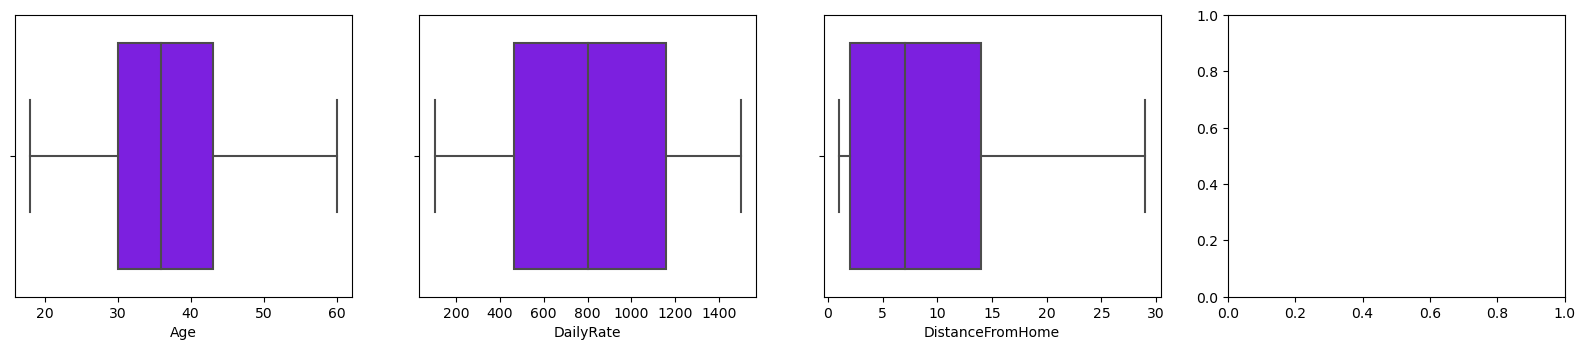

In [85]:
#Outliers Detection and Removal

plt.figure(figsize=(20,30))
plotnumber=1

for column in Numeric:
    if plotnumber<=28:
        ax=plt.subplot(7,4,plotnumber)
        sns.boxplot(HR_dataset[column])
        plt.xlabel(column)
    plotnumber+=1
plt.show()




In [58]:
from scipy.stats import zscore
z = np.abs(zscore(HR_dataset))
threshold = 3
HR2_dataset = HR_dataset[(z<3).all(axis = 1)]

print ("Shape of the dataframe before removing outliers: ", HR_dataset.shape)
print ("Shape of the dataframe after removing outliers: ", HR2_dataset.shape)
print ("Percentage of data loss post outlier removal: ", (HR_dataset.shape[0]-HR2_dataset.shape[0])/HR_dataset.shape[0]*100)

HR_dataset=HR2_dataset.copy()

TypeError: unsupported operand type(s) for /: 'str' and 'int'

In [61]:
print("\033[1m"+'Percentage Data Loss :'+"\033[0m",((1470-1387)/1470)*100,'%')


Percentage Data Loss : 5.646258503401361 %


In [62]:
HR_dataset.skew()

Age                        0.413286
Attrition                  1.844366
BusinessTravel            -1.439006
DailyRate                 -0.003519
Department                 0.172231
DistanceFromHome           0.958118
EducationField             0.550371
Gender                    -0.408665
HourlyRate                -0.032311
JobRole                   -0.357270
MaritalStatus             -0.152175
MonthlyIncome              1.369817
MonthlyRate                0.018578
NumCompaniesWorked         1.026471
OverTime                   0.964489
PercentSalaryHike          0.821128
StockOptionLevel           0.968980
TotalWorkingYears          1.117172
TrainingTimesLastYear      0.553124
YearsAtCompany             1.764529
YearsInCurrentRole         0.917363
YearsSinceLastPromotion    1.984290
YearsWithCurrManager       0.833451
dtype: float64

In [63]:
# Splitting data in target and dependent feature
X = HR_dataset.drop(['Attrition'], axis =1)
Y = HR_dataset['Attrition']

In [64]:
#Transforming skew data using power transform
from sklearn.preprocessing import power_transform
HR_dataset = power_transform(x)
HR_dataset = pd.DataFrame(HR_dataset, columns=x.columns)
HR_dataset.skew()

TypeError: float() argument must be a string or a number, not 'AxesSubplot'

In [65]:
HR_dataset.corr()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,EducationField,Gender,HourlyRate,JobRole,...,NumCompaniesWorked,OverTime,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.159205,0.024751,0.010661,-0.031882,-0.001686,-0.040873,-0.036311,0.024287,-0.122427,...,0.299635,0.028062,0.003634,0.037510,0.680381,-0.019621,0.311309,0.212901,0.216513,0.202089
Attrition,-0.159205,1.000000,0.000074,-0.056652,0.063991,0.077924,0.026846,0.029453,-0.006846,0.067151,...,0.043494,0.246118,-0.013478,-0.137145,-0.171063,-0.059478,-0.134392,-0.160545,-0.033019,-0.156199
BusinessTravel,0.024751,0.000074,1.000000,-0.004086,-0.009044,-0.024469,0.023724,-0.032981,0.026528,0.002724,...,0.020875,0.016543,-0.029377,-0.016727,0.034226,0.015240,-0.014575,-0.011497,-0.032591,-0.022636
DailyRate,0.010661,-0.056652,-0.004086,1.000000,0.007109,-0.004985,0.037709,-0.011716,0.023381,-0.009472,...,0.038153,0.009135,0.022704,0.042143,0.014515,0.002453,-0.034055,0.009932,-0.033229,-0.026363
Department,-0.031882,0.063991,-0.009044,0.007109,1.000000,0.017225,0.013720,-0.041583,-0.004144,0.662431,...,-0.035882,0.007481,-0.007840,-0.012193,-0.015762,0.036875,0.022920,0.056315,0.040061,0.034282
DistanceFromHome,-0.001686,0.077924,-0.024469,-0.004985,0.017225,1.000000,0.002013,-0.001851,0.031131,-0.001015,...,-0.029251,0.025514,0.040235,0.044872,0.004628,-0.036942,0.009508,0.018845,0.010029,0.014406
EducationField,-0.040873,0.026846,0.023724,0.037709,0.013720,0.002013,1.000000,-0.002504,-0.021941,0.015599,...,-0.008663,0.002259,-0.011214,-0.016185,-0.027848,0.049195,-0.018692,-0.010506,0.002326,-0.004130
Gender,-0.036311,0.029453,-0.032981,-0.011716,-0.041583,-0.001851,-0.002504,1.000000,-0.000478,-0.039723,...,-0.039147,-0.041924,0.002733,0.012716,-0.046881,-0.038787,-0.029747,-0.041483,-0.026985,-0.030599
HourlyRate,0.024287,-0.006846,0.026528,0.023381,-0.004144,0.031131,-0.021941,-0.000478,1.000000,-0.018861,...,0.022157,-0.007782,-0.009062,0.050263,-0.002334,-0.008548,-0.019582,-0.024106,-0.026716,-0.020123
JobRole,-0.122427,0.067151,0.002724,-0.009472,0.662431,-0.001015,0.015599,-0.039723,-0.018861,1.000000,...,-0.056368,0.040662,-0.000848,-0.019171,-0.145439,0.001342,-0.083657,-0.028354,-0.046384,-0.041150


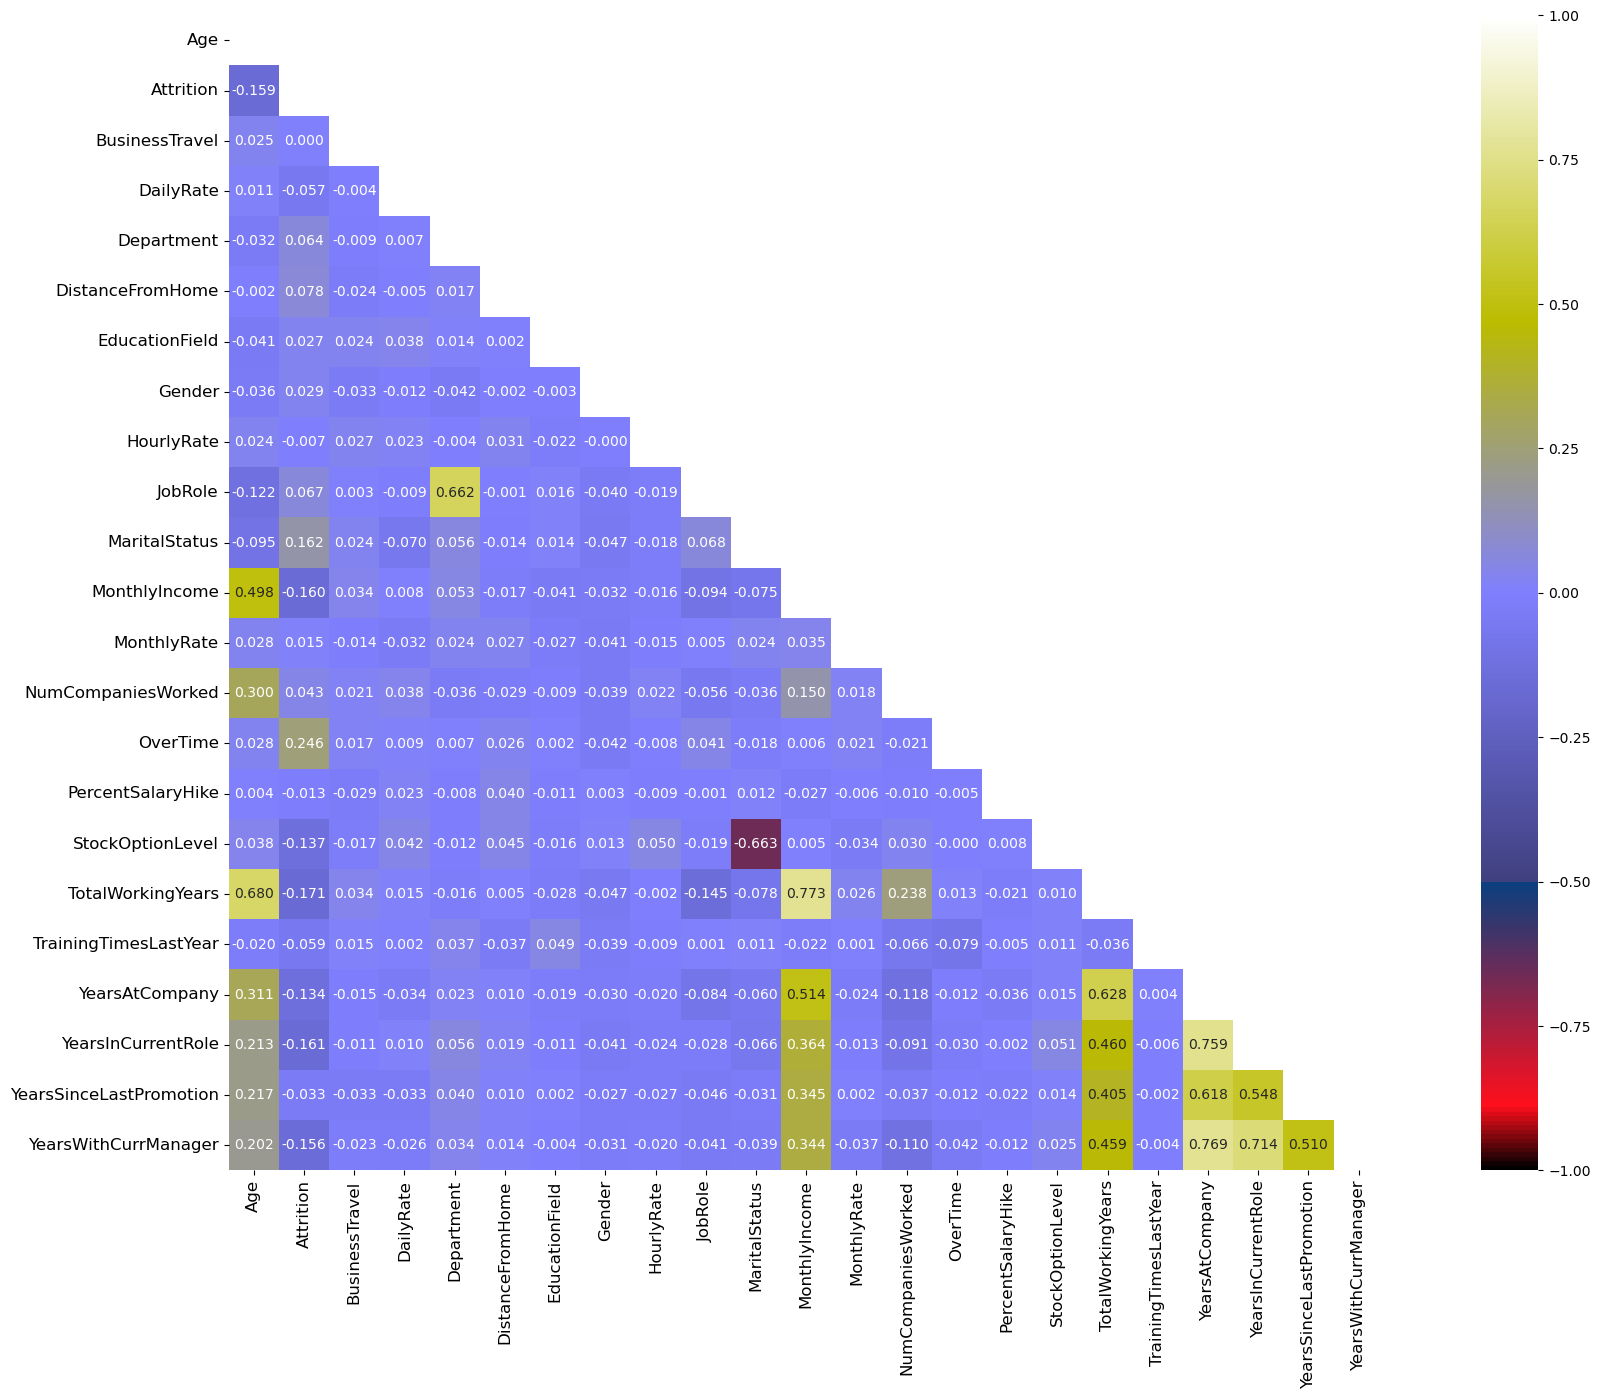

In [66]:
upper_triangle = np.triu(HR_dataset.corr())
plt.figure(figsize=(25,15))
sns.heatmap(HR_dataset.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':10}, cmap="gist_stern", mask=upper_triangle)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [67]:
plt.figure(figsize = (18,6))
HR2_dataset.corr()['Attrition'].drop(['Attrition']).plot(kind='bar',color = 'c')
plt.xlabel('Features',fontsize=15)
plt.ylabel('Attrition',fontsize=15)
plt.title('Correlation of features with Target Variable Attrition',fontsize = 18)
plt.show()

NameError: name 'HR2_dataset' is not defined

<Figure size 1800x600 with 0 Axes>

In [69]:
 #Checking Multicollinearity between features using variance_inflation_factor
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif= pd.DataFrame()
vif['VIF']= [variance_inflation_factor(HR_dataset.values,i) for i in range(HR_dataset.shape[1])]
vif['Features']= HR_dataset.columns
vif

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [70]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

ValueError: could not convert string to float: 'College'

In [71]:
from sklearn.decomposition import PCA
pca = PCA()
#plot the graph to find the principal components
x_pca = pca.fit_transform(X_scale)
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.xlabel('Number of Components')
plt.ylabel('Variance %')
plt.title('Explained variance Ratio')
plt.grid()

NameError: name 'X_scale' is not defined

In [73]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier


In [75]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=42, test_size=.33)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (984, 30)
Training target vector size: (984,)
Test feature matrix size: (486, 30)
Test target vector size: (486,)


In [77]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score
maxAccu=0
maxRS=0
for i in range(1,250):
    X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.33, random_state=i)
    log_reg=LogisticRegression()
    log_reg.fit(X_train,Y_train)
    y_pred=log_reg.predict(X_test)
    acc=accuracy_score(Y_test,y_pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is', maxAccu ,'on Random_state', maxRS)

ValueError: could not convert string to float: 'Master'

In [79]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=242, test_size=.33)
log_reg=LogisticRegression()
log_reg.fit(X_train,Y_train)
y_pred=log_reg.predict(X_test)
print('\033[1m'+'Logistics Regression Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Logistics Regression :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Logistics Regression :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of Logistics Regression'+'\033[0m \n',classification_report(Y_test, y_pred))

ValueError: could not convert string to float: 'Master'

In [81]:
from sklearn import neighbors
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse_val = []
for K in range(30):
    K = K+1
    model = neighbors.KNeighborsClassifier(n_neighbors = K)

    model.fit(X_train,Y_train) 
    y_pred=model.predict(X_test) 
    error = sqrt(mean_squared_error(Y_test,y_pred)) 
    rmse_val.append(error)
    print('RMSE value for k= ' , K , 'is:', error)

ValueError: could not convert string to float: 'Master'

ValueError: x and y must have same first dimension, but have shapes (30,) and (0,)

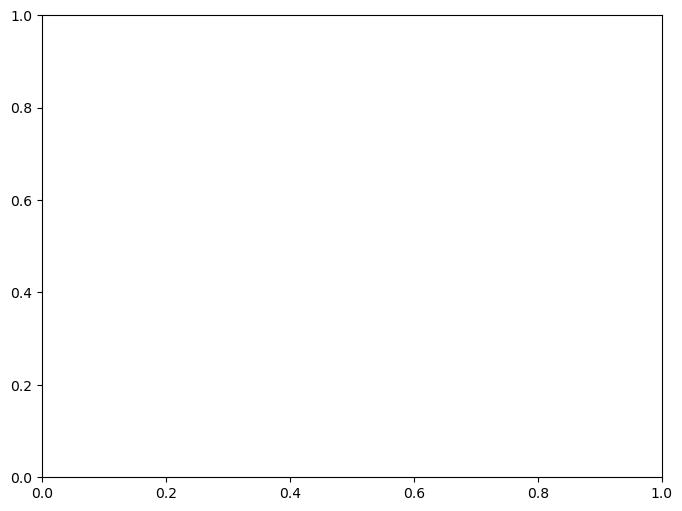

In [82]:
#plotting the rmse values against k values -
plt.figure(figsize = (8,6))
plt.plot(range(30), rmse_val, color='blue', linestyle='dashed', marker='o', markerfacecolor='green', markersize=10)